Forcada Rodríguez, Elisa

#**HUGGINGFACE EXPERIMENT**

The aim of this script is to develop the third step of the experiment related to the final project of the **DL4NLP course** of the **HAP-LAP/EMLCT Master** (UPV/EHU). To this end, several tests are carried out with different standard models hosted in Hugging Face, and a function is developed to evaluate the performance of these models in terms of the perplexity metric.

Then, the PG-19 dataset, selected to determine the performance of the three models proposed and explained in the paper project, is loaded: the problem arises when trying to upload these models, due to their large size. Even with a Colab Pro subscription, the environment runs out of RAM, which makes it impossible to upload the models, and therefore to complete this experiment.

##**1. Environment preparation**

First, the `transformers Hugging Face` library is installed: `transformers` is a well-known package in the NLP area, and it provides pre-trained implementations of several models, such as BERT or GPT.

In [1]:
!pip install transformers

Later, the `datasets Hugging Face` library is also installed: this library allows the access to high-guality datasets, data preprocessing, metrics and evaluation, etc.

In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.6 MB/s eta 0:00:00


##**2. Pipeline testing and implementation**

After installing the required libraries, the `pipeline`function is loaded: it allows  to directly use pre-trained models for NLP tasks without having to develop complex code.

In [3]:
from transformers import pipeline

###**2.1. Sentiment analysis example**

Next, an example pipeline is created: in this case, related to sentiment analysis. As no specific model name is written, the pipeline automatically selects a default one, called `distilbert-base-uncased-finetuned-sst-2-english`.

In [4]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Once the target and the (default) model of the `pipeline` have been specified, they are used to perform sentiment analysis on a sample sentence. As it can be seen, the output shows the sentiment predicted by the model, along with its probability.

In [5]:
classifier("Thanks a lot for watching the video. I really appreciate it")

[{'label': 'POSITIVE', 'score': 0.999822199344635}]

The `pipeline` function can also be used to predict the sentiment of several texts, not just one: in the following snippet, a list containing two texts is loaded. The model then iterates over this list and displays the sentiment labels of the two texts, along with their confidence scores.

In [6]:
results = classifier(["Thanks a lot guys", "This video is not cool"]) #List of examples
for result in results: #Iterating over examples list
  print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

label: POSITIVE, with score: 0.9997
label: NEGATIVE, with score: 0.9998


###**2.2. Text generation example**

Next, another experiment is performed, this time with the aim of generating text. As in the previous example, the task to be performed is specified: on the other hand, as no specific model name is given, the pipeline function loads the model `openai-community/gpt2` by default.

In [7]:
generator = pipeline("text-generation")

No model was supplied, defaulted to openai-community/gpt2 and revision 6c0e608 (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

As in the former case, once the new pipeline has been configured, it can be used: in this section, instead of making predictions, the model will generate text from a prompt. As it can be observed in the result of the following snippet, the generated sequence is not entirely coherent (especially in the ending part). However, it can be seen that the pipeline function works correctly with these models.

In [8]:
generator("I am Elisa and I am from Spain")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'I am Elisa and I am from Spain. As the family, I enjoy living in a house with so many people. I am still afraid of breaking anything I know about me. But the truth is about myself.\n\n"Why are you'}]

##**3. Perplexity testing and implementation**

Once the `pipeline` function is understood, another hand-made function is developed to calculate the perplexity on the performance of the models proposed in the paper. To test its correct functioning, the function is used on an example model, `openai-community/gpt2-large`, with its corresponding tokeniser, loaded in the following snippet. In addition, it also sets the device to be used, if available (`device="cuda"`): this can speed up processing, which is especially useful when loading large models such as GPT-2.

In [9]:
from transformers import GPT2LMHeadModel, GPT2TokenizerFast

device = "cuda" #Use GPU if available
model_id = "openai-community/gpt2-large" #Loading model id
model = GPT2LMHeadModel.from_pretrained(model_id).to(device) #Loading model
tokenizer = GPT2TokenizerFast.from_pretrained(model_id) #Loading tokenizer

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Next, the `load_dataset` function is imported to load a dataset from Wikitext, namely the `test` partition of `wikitext-2-raw-v1`. The dataset is preprocessed using the previously uploaded tokeniser, concatenating all the data using the `join` function after adding two line breaks between each text: this method is commonly used to ensure that language models are able to recognise the start and end of a text. The result of this preprocessing is stored in the variable `encodings` as PyTorch tensors.

In [10]:
from datasets import load_dataset

test = load_dataset("wikitext", "wikitext-2-raw-v1", split="test") #Loading data
encodings = tokenizer("\n\n".join(test["text"]), return_tensors="pt") #Preprocessing and saving data

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/36718 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (287644 > 1024). Running this sequence through the model will result in indexing errors


Once both the model and the dataset have been configured and loaded, a function is created to evaluate the perplexity of the model on the selected data. This is done by first importing the `torch` and `tqdm` modules. Three variables are then set:
- Maximum input sequence length.
- The size of the window from which the input is processed sequentially.
- Total length of the text obtained from the input encoding.

Once these variables are set, a `for` loop is initialized to iterate over the dataset (according to the step length) to obtain and store the token ids. When this is done, the loss is calculated by using the `Cross Entropy Loss`, represented by the following formula:


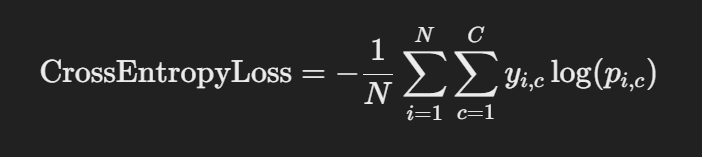






where **N** is the number of examples in the data set, **yi** is the true label of example **i**, **pi** is the probability predicted by the model for a class in example **i**, **C** is the number of classes in the multi-class classification, **yi,c** is a binary indicator representing whether example i belongs to class **c**, and **pi,c** is the probability predicted by the model for class **c** in example **i**.

Once the loss is obtained, it is stored in `nlls` as a tensor, and the loop goes through the following sequence: when there is no more data, the mean of `nlls` is calculated. Then, the exponential of each element of the tensor is calculated, in order to obtain the total perplexity of the model over all the data.

In [11]:
import torch #For tensor calculations
from tqdm import tqdm #To show progress graphics

#VARIABLES
max_length = model.config.n_positions  #Maximum lenght
stride = 512 #Step size for window shifting
seq_len = encodings.input_ids.size(1) #Total text lenght

nlls = [] #Initializing an empty list
prev_end_loc = 0 # #Initializing previous end location
for begin_loc in tqdm(range(0, seq_len, stride)): #Iterating over the text with stride lenght
    end_loc = min(begin_loc + max_length, seq_len) #Beginning and end of actual window (stride)
    trg_len = end_loc - prev_end_loc  # Calculating the lenght of the current sequence
    input_ids = encodings.input_ids[:, begin_loc:end_loc].to(device) #Selecting tokens and copying them as target_ids in the GPU
    target_ids = input_ids.clone() #Copying inputs id and storing them in new variable
    target_ids[:, :-trg_len] = -100 # Masking tokens in target_ids that are not part of the sequence

    with torch.no_grad(): #To avoid tracking history for gradients (we are NOT training!!!)
        outputs = model(input_ids, labels=target_ids) #Input and target ids
        neg_log_likelihood = outputs.loss #Calculated loss by using CrossEntropyLoss

    nlls.append(neg_log_likelihood) #Appending the calculated loss into the empty list

    prev_end_loc = end_loc #Previous end is updated into actual end
    if end_loc == seq_len: #If they are same:
        break #Break loopñ (end of data)

ppl = torch.exp(torch.stack(nlls).mean()) #Nlls stacked into a tensor, and mean calculated.
#Then, exponential of each element of tensor is obtained, yielding the total ppl of the model

100%|█████████▉| 560/562 [05:15<00:01,  1.78it/s]


Once the function is done, it is run: as it can be seen in the following snippet, the perplexity of the GPT-2 large model on the Wikitext2 test dataset is `16.4541`. This calculation was done using the `Cuda:0` GPU.

In [12]:
ppl

tensor(16.4541, device='cuda:0')

##**4. Paper experiments**

Having understood how to use the `pipeline`function to load models and datasets, and having developed a function to calculate perplexity, now the dataset and the specific models that will be useful for the project itself are loaded.

###**4.1. Dataset**

First, the PG-19 dataset is loaded. Although it is very large, it does not cause any problems when loaded (without taking into account that it takes more than an hour to fully being loaded).

In [ ]:
from datasets import load_dataset

dataset = load_dataset("pg19")

###**4.2. Models**

When it comes to uploading the models, Google Colab runs out of memory, as shown in the following screenshots, even with the paid **Pro** option, which increases the RAM from 12.7 GB to 51.0 GB:


**Llama2 fine-tuned running out of RAM**
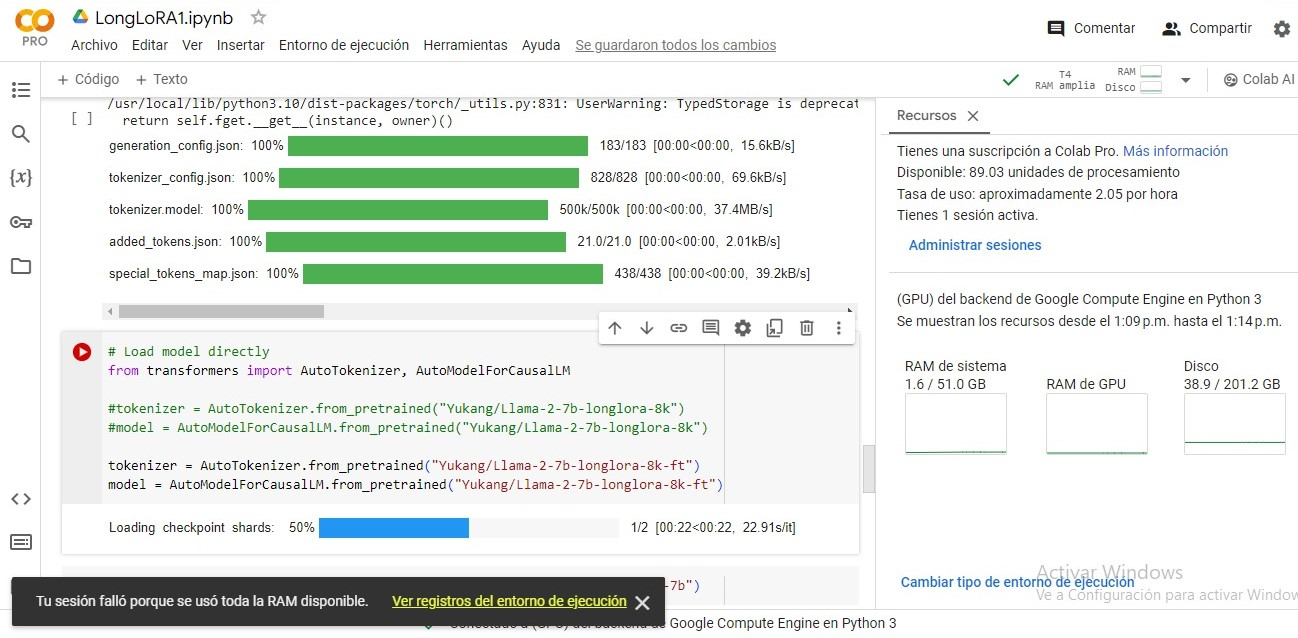

**Alpaca with LoRA running out of RAM**
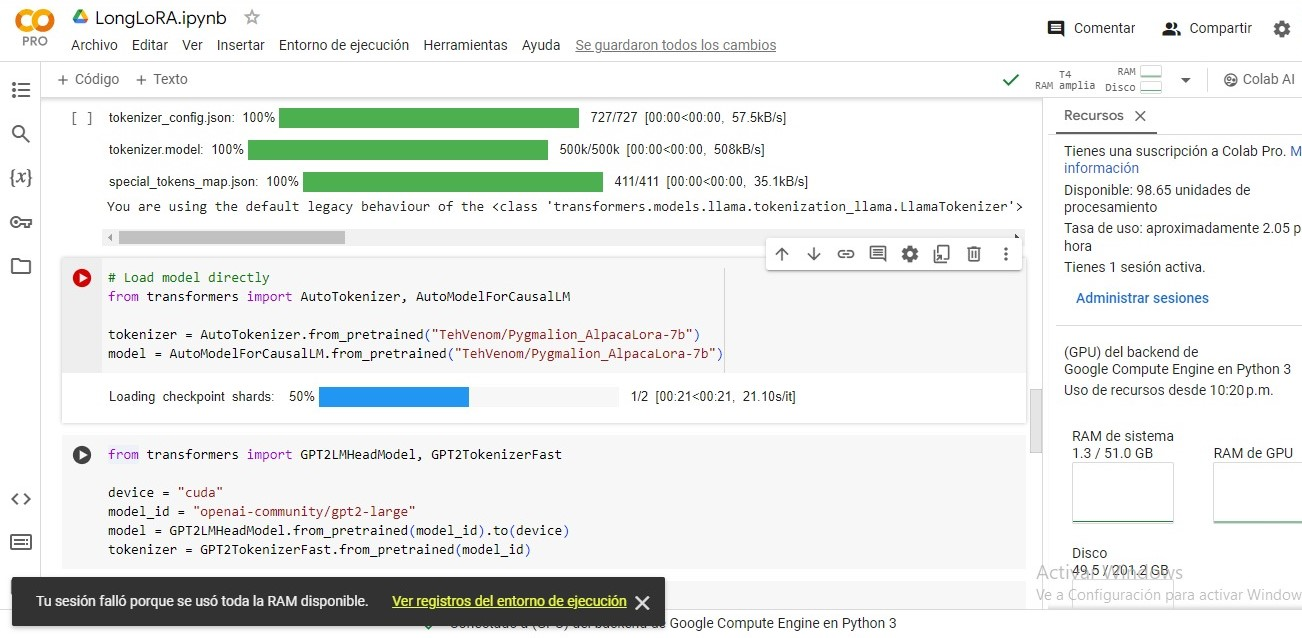


This happens with both the Llama2 fine-tuned model and the Alpaca LoRA model: as it can be seen from the results of the runs, both models are very large, making it impossible to load them in generic environments such as Google Colab or Jupyter Notebook, or locally on normal computers.

####**4.2.1. Llama2 fine-tuned**

In [ ]:
pipe = pipeline("text-generation", model="Yukang/Llama-2-7b-longlora-8k-ft")

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("Yukang/Llama-2-7b-longlora-8k-ft")
model = AutoModelForCausalLM.from_pretrained("Yukang/Llama-2-7b-longlora-8k-ft")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/828 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

####**4.2.2. Alpaca with LoRA**

In [ ]:
pipe1 = pipeline("text-generation", model="TehVenom/Pygmalion_AlpacaLora-7b")

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("TehVenom/Pygmalion_AlpacaLora-7b")
model = AutoModelForCausalLM.from_pretrained("TehVenom/Pygmalion_AlpacaLora-7b")

####**4.2.3. Llama2 with LongLoRA**
This third model already presents a problem in the HuggingFace interface: as it can be seen in the following screenshot, the model cannot be executed either due to a missing file. In any case, even if this initial problem had not existed, given the size of the models previously attempted to be uploaded and the similar size of this third model, it is very likely that the RAM would have been overloaded as well.

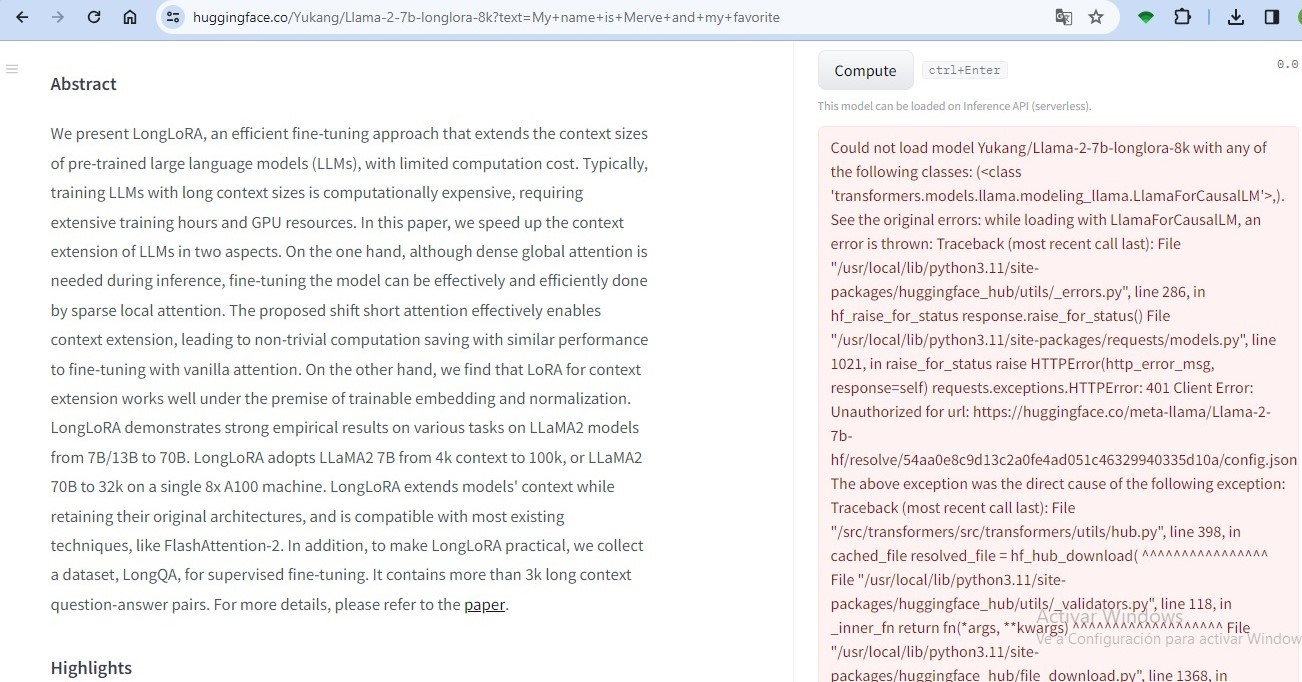

##**5. Conclusions**

Although the experiment is not complete, it has served to explore and explain the different possibilities of the `pipeline`function of HuggingFace: it has been used with sentiment analysis and text generation models to understand how it works. On the other hand, a function for calculating the perplexity of the models was developed, and its correct functioning was tested with a dataset and a specific model. Therefore, the pipeline of this experiment is clear and can be easily implemented and executed with different models and datasets: the only failure occurs when loading the models needed for the topic addressed in the final project, due to their large dimensions, which make their extra-commercial use on generic platforms impossible.